In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
%matplotlib notebook

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('mean_price.csv', 7, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.056331634521484375


In [8]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 495 samples, validate on 27 samples
Epoch 1/1
495/495 [==============================] - 0s 264us/step - loss: 0.0348 - val_loss: 0.0174


predictions:


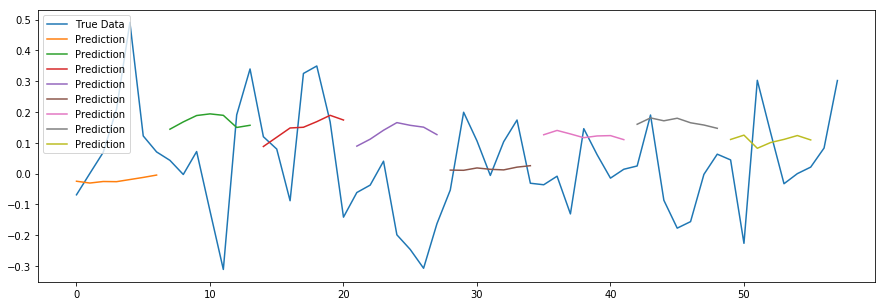

In [9]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 7, 7)
lstm.plot_results_multiple(predictions, y_test, 7)

In [10]:
predictions

[[-0.024675671,
  -0.030547954,
  -0.025548885,
  -0.026092926,
  -0.01917705,
  -0.012283529,
  -0.004651708],
 [0.14432898,
  0.1680205,
  0.1887153,
  0.19408244,
  0.1893496,
  0.14994572,
  0.1570254],
 [0.08816046,
  0.11822548,
  0.14830711,
  0.15063176,
  0.16881357,
  0.18939918,
  0.17417541],
 [0.08932705,
  0.111923516,
  0.14094186,
  0.1657024,
  0.15692902,
  0.15097405,
  0.12671329],
 [0.011470745,
  0.010857001,
  0.018488085,
  0.014051318,
  0.012160568,
  0.021108894,
  0.025784923],
 [0.12634753,
  0.14031415,
  0.12894298,
  0.116726495,
  0.122393556,
  0.123504646,
  0.11039163],
 [0.16033432,
  0.1809432,
  0.1716122,
  0.1799366,
  0.16518697,
  0.15788502,
  0.14720812],
 [0.11100505,
  0.12502654,
  0.08236071,
  0.1010724,
  0.111232504,
  0.12369759,
  0.10944942]]